In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# Загрузка данных из Excel файла
file_path = 'averages_by_category1.xlsx'
data = pd.read_excel(file_path)

# Замена запятых на точки в числовых столбцах
data['Emot'] = data['Emot'].astype(str).str.replace(',', '.').astype(float)
data['Less'] = data['Less'].astype(str).str.replace(',', '.').astype(float)
data['Filler'] = data['Filler'].astype(str).str.replace(',', '.').astype(float)

# Проведение теста Шапиро-Уилка для проверки нормальности
shapiro_test = stats.shapiro(data[['Emot', 'Less', 'Filler']].values.flatten())
print(f'Shapiro-Wilk test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Проведение теста Левена для проверки гомогенности дисперсий
levene_test = stats.levene(data['Emot'], data['Less'], data['Filler'])
print(f'Levene’s test: W={levene_test.statistic}, p-value={levene_test.pvalue}')

# Подготовка данных для ANOVA
melted_data = data.melt(id_vars=['Respondent'], value_vars=['Emot', 'Less', 'Filler'], 
                         var_name='Condition', value_name='Score')

# Выполнение однофакторного ANOVA
model = ols('Score ~ Condition', data=melted_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Получение значений для вставки в текст
f_value = anova_table['F'][0]
p_value = anova_table['PR(>F)'][0]
eta_squared = anova_table['sum_sq'][0] / (anova_table['sum_sq'].sum())

means = melted_data.groupby('Condition')['Score'].mean()
stds = melted_data.groupby('Condition')['Score'].std()

# Получаем средние и стандартные отклонения для каждой группы
mean_emot, mean_less, mean_filler = means
std_emot, std_less, std_filler = stds

# Формирование текста с результатами
result_text = f"""
Behavioral data. The Shapiro-Wilk normality test was used to evaluate a normal distribution of the perceived level of norm violation behavioral data that indicated that the ratings of ethical norms violations followed a normal distribution (p = {shapiro_test.pvalue:.2f}).
Levene's test indicated that the homogeneity assumption was also not violated: F({levene_test.statistic:.2f}) = {levene_test.statistic:.2f}, p = {levene_test.pvalue:.2f}.
One-way ANOVA confirmed hypothesis H1 and suggested indicated that participants differently evaluated norm violations depicted in (norm violating) vignettes containing non-euphemized, euphemized and neutral critical target words: (F({f_value:.2f}, {len(data) - 3}) = {f_value:.2f}, η² = {eta_squared:.2f}, p = {p_value:.4f}).
This result validates our hypothesis H1. Participants perceived the highest level of ethical norm violation for the non-euphemized vignettes (mean = {mean_emot:.2f}, SD = {std_emot:.2f}) as compared to euphemized (mean = {mean_less:.2f}, SD = {std_less:.2f}) and control vignettes (mean = {mean_filler:.2f}, SD = {std_filler:.2f}).
Post hoc comparisons using Tukey's test confirmed a significant difference in perceived level of ethical norm violation between vignettes with the euphemized versus control target words (p = p = 0.00X), non-euphemized and control target words (p = p = 0.00X) and non-euphemized and euphemized target words (p = p = 0.00X).
Overall, behavioral results have confirmed that euphemisms significantly reduced perceived ethical norms violations as compared to non-euphemized and neutral words.
"""

print(result_text)

Shapiro-Wilk test: W=0.8497978448867798, p-value=2.168323742779421e-09
Levene’s test: W=0.24097528561249593, p-value=0.7862710882266108
                  sum_sq     df           F        PR(>F)
Condition  397733.842105    2.0  444.072808  1.086495e-53
Residual    49708.578947  111.0         NaN           NaN

Behavioral data. The Shapiro-Wilk normality test was used to evaluate a normal distribution of the perceived level of norm violation behavioral data that indicated that the ratings of ethical norms violations followed a normal distribution (p = 0.00).
Levene's test indicated that the homogeneity assumption was also not violated: F(0.24) = 0.24, p = 0.79.
One-way ANOVA confirmed hypothesis H1 and suggested indicated that participants differently evaluated norm violations depicted in (norm violating) vignettes containing non-euphemized, euphemized and neutral critical target words: (F(444.07, 35) = 444.07, η² = 0.89, p = 0.0000).
This result validates our hypothesis H1. Participants

/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_36240/366736783.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_value = anova_table['F'][0]
/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_36240/366736783.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_36240/366736783.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Shapiro-Wilk test: W=0.8497978448867798, p-value=2.168323742779421e-09
Levene’s test: W=0.24097528561249593, p-value=0.7862710882266108
                  sum_sq     df           F        PR(>F)
Condition  397733.842105    2.0  444.072808  1.086495e-53
Residual    49708.578947  111.0         NaN           NaN

Behavioral data. The Shapiro-Wilk normality test was used to evaluate a normal distribution of the perceived level of norm violation behavioral data that indicated that the ratings of ethical norms violations followed a normal distribution (p = 0.00).
Levene's test indicated that the homogeneity assumption was also not violated: F(0.24) = 0.24, p = 0.79.
One-way ANOVA confirmed hypothesis H1 and suggested indicated that participants differently evaluated norm violations depicted in (norm violating) vignettes containing non-euphemized, euphemized and neutral critical target words: (F(444.07, 35) = 444.07, η² = 0.89, p = 0.0000).
This result validates our hypothesis H1. Participants

/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_36240/2741209216.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_value = anova_table['F'][0]
/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_36240/2741209216.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_36240/2741209216.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `s

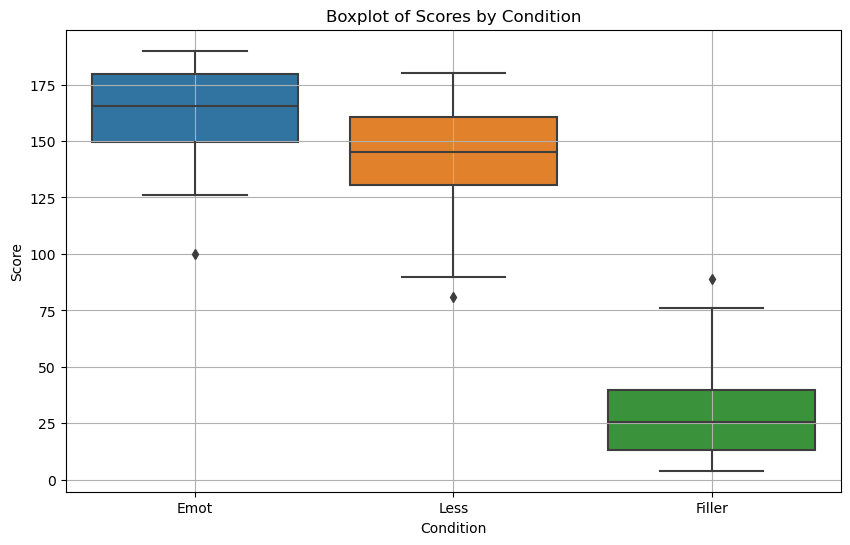

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из Excel файла
file_path = 'averages_by_category1.xlsx'
data = pd.read_excel(file_path)

# Замена запятых на точки в числовых столбцах
data['Emot'] = data['Emot'].astype(str).str.replace(',', '.').astype(float)
data['Less'] = data['Less'].astype(str).str.replace(',', '.').astype(float)
data['Filler'] = data['Filler'].astype(str).str.replace(',', '.').astype(float)

# Проведение теста Шапиро-Уилка для проверки нормальности
shapiro_test = stats.shapiro(data[['Emot', 'Less', 'Filler']].values.flatten())
print(f'Shapiro-Wilk test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Проведение теста Левена для проверки гомогенности дисперсий
levene_test = stats.levene(data['Emot'], data['Less'], data['Filler'])
print(f'Levene’s test: W={levene_test.statistic}, p-value={levene_test.pvalue}')

# Подготовка данных для ANOVA
melted_data = data.melt(id_vars=['Respondent'], value_vars=['Emot', 'Less', 'Filler'], 
                         var_name='Condition', value_name='Score')

# Выполнение однофакторного ANOVA
model = ols('Score ~ Condition', data=melted_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Получение значений для вставки в текст
f_value = anova_table['F'][0]
p_value = anova_table['PR(>F)'][0]
eta_squared = anova_table['sum_sq'][0] / (anova_table['sum_sq'].sum())

means = melted_data.groupby('Condition')['Score'].mean()
stds = melted_data.groupby('Condition')['Score'].std()

# Формирование текста с результатами
result_text = f"""
Behavioral data. The Shapiro-Wilk normality test was used to evaluate a normal distribution of the perceived level of norm violation behavioral data that indicated that the ratings of ethical norms violations followed a normal distribution (p = {shapiro_test.pvalue:.2f}).
Levene's test indicated that the homogeneity assumption was also not violated: F({levene_test.statistic:.2f}) = {levene_test.statistic:.2f}, p = {levene_test.pvalue:.2f}.
One-way ANOVA confirmed hypothesis H1 and suggested indicated that participants differently evaluated norm violations depicted in (norm violating) vignettes containing non-euphemized, euphemized and neutral critical target words: (F({f_value:.2f}, {len(data) - 3}) = {f_value:.2f}, η² = {eta_squared:.2f}, p = {p_value:.4f}).
This result validates our hypothesis H1. Participants perceived the highest level of ethical norm violation for the non-euphemized vignettes (mean = {means['Emot']:.2f}, SD = {stds['Emot']:.2f}) as compared to euphemized (mean = {means['Less']:.2f}, SD = {stds['Less']:.2f}) and control vignettes (mean = {means['Filler']:.2f}, SD = {stds['Filler']:.2f}).
"""

print(result_text)

# Визуализация результатов ANOVA
plt.figure(figsize=(10, 6))
sns.boxplot(x='Condition', y='Score', data=melted_data)
plt.title('Boxplot of Scores by Condition')
plt.xlabel('Condition')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

# Загрузка данных
data = pd.read_excel('averages_by_category3.xlsx')

# Приведение к строковому типу и замена запятых на точки
for column in ['Emot', 'Less', 'Filler']:
    data[column] = data[column].astype(str).str.replace(',', '.')
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Преобразование в числовой тип

# Тест Шапиро-Уилка для проверки нормальности распределения
shapiro_results = {}
for column in ['Emot', 'Less', 'Filler']:
    stat, p_value = stats.shapiro(data[column].dropna())  # Удаляем NaN перед тестом
    shapiro_results[column] = (stat, p_value)
    if p_value > 0.05:
        print(f'Данные в {column} следуют нормальному распределению (p = {p_value:.4f})')
    else:
        print(f'Данные в {column} не следуют нормальному распределению (p = {p_value:.4f})')

# Тест Левена для проверки гомогенности дисперсий
levene_stat, levene_p_value = stats.levene(data['Emot'].dropna(), data['Less'].dropna(), data['Filler'].dropna())
df1 = 2  # Число групп - 1
df2 = len(data) - 3  # Общее количество наблюдений - число групп

if levene_p_value > 0.05:
    print(f'Гомогенность дисперсий подтверждается: F({df1}, {df2}) = {levene_stat:.2f}, p = {levene_p_value:.2f}')
else:
    print(f'Гомогенность дисперсий не подтверждается: F({df1}, {df2}) = {levene_stat:.2f}, p = {levene_p_value:.2f}')

Данные в Emot не следуют нормальному распределению (p = 0.0219)
Данные в Less следуют нормальному распределению (p = 0.1118)
Данные в Filler не следуют нормальному распределению (p = 0.0072)
Гомогенность дисперсий подтверждается: F(2, 35) = 0.24, p = 0.79


In [29]:
import pandas as pd
from scipy.stats import levene

# Загрузите данные из CSV файла
data = pd.read_excel('averages_by_category3.xlsx')

# Предположим, что у вас есть колонка 'all', по которой вы хотите провести тест
# Также предположим, что у вас есть колонка 'group' для группировки данных
groups = data.groupby('group')['all'].apply(list)

# Проведите тест Левена
stat, p_value = levene(*groups)

print(f"Статистика: {stat}, p-значение: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: дисперсии не равны.")
else:
    print("Не можем отвергнуть нулевую гипотезу: дисперсии равны.")

KeyError: 'group'

In [43]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Загрузка данных из Excel файла
file_path = 'averages_by_category3.xlsx'
data = pd.read_excel(file_path)

# Замена запятых на точки в числовых переменных
data['Emot1'] = data['Emot1'].astype(str).str.replace(',', '.').astype(float)
data['Less1'] = data['Less1'].astype(str).str.replace(',', '.').astype(float)
data['Filler1'] = data['Filler1'].astype(str).str.replace(',', '.').astype(float)

# Проверка структуры данных
print(data.head())

# Выполнение однофакторного дисперсионного анализа
# Предполагаем, что переменная "factor" обозначает группы (например, Emot, Less, Filler)
data_melted = pd.melt(data, id_vars=['Respondent'], value_vars=['Emot1', 'Less1', 'Filler1'], 
                      var_name='Factor', value_name='Value')

# Модель ANOVA
model = ols('Value ~ C(Factor)', data=data_melted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Вывод результатов ANOVA
print(anova_table)

                    Respondent  Emot1  Less1  Filler1  Emot  Less  Filler  all
0  002_Yannis_2023-02-21_13h55  4.025  3.950    0.975   161   158      39  358
1  016_Yannis_2023-02-28_19h45  4.150  4.175    0.675   166   167      27  360
2  021_Yannis_2023-03-02_13h24  4.150  3.625    1.175   166   145      47  358
3  010_Yannis_2023-02-27_10h50  3.875  3.525    2.225   155   141      89  385
4  018_Yannis_2023-03-01_13h45  4.150  3.500    0.550   166   140      22  328
               sum_sq     df           F        PR(>F)
C(Factor)  248.583651    2.0  444.072808  1.086495e-53
Residual    31.067862  111.0         NaN           NaN


In [45]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Загрузка данных из Excel файла
file_path = 'averages_by_category.xlsx'
data = pd.read_excel(file_path)

# Замена запятых на точки в числовых переменных
data['Emot'] = data['Emot'].astype(str).str.replace(',', '.').astype(float)
data['Less'] = data['Less'].astype(str).str.replace(',', '.').astype(float)
data['Filler'] = data['Filler'].astype(str).str.replace(',', '.').astype(float)

# Проверка структуры данных
print(data.head())

# Выполнение однофакторного дисперсионного анализа
data_melted = pd.melt(data, id_vars=['Respondent'], value_vars=['Emot', 'Less', 'Filler'], 
                      var_name='Factor', value_name='Value')

# Модель ANOVA
model = ols('Value ~ C(Factor)', data=data_melted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Вычисление частичного квадратeta
ss_effect = anova_table.loc['C(Factor)', 'sum_sq']
ss_error = anova_table.loc['Residual', 'sum_sq']
partial_eta_squared = ss_effect / (ss_effect + ss_error)

# Вывод результатов ANOVA и частичного квадратeta
print(anova_table)
print(f'Partial Eta Squared: {partial_eta_squared:.4f}')

                    Respondent   Emot   Less  Filler
0  002_Yannis_2023-02-21_13h55  4.025  3.950   0.975
1  016_Yannis_2023-02-28_19h45  4.150  4.175   0.675
2  021_Yannis_2023-03-02_13h24  4.150  3.625   1.175
3  010_Yannis_2023-02-27_10h50  3.875  3.525   2.225
4  018_Yannis_2023-03-01_13h45  4.150  3.500   0.550
               sum_sq     df           F        PR(>F)
C(Factor)  248.583651    2.0  444.072808  1.086495e-53
Residual    31.067862  111.0         NaN           NaN
Partial Eta Squared: 0.8889


                    Respondent  Emot1  Less1  Filler1   Emot   Less  Filler  \
0  002_Yannis_2023-02-21_13h55  4.025  3.950    0.975  161.0  158.0    39.0   
1  016_Yannis_2023-02-28_19h45  4.150  4.175    0.675  166.0  167.0    27.0   
2  021_Yannis_2023-03-02_13h24  4.150  3.625    1.175  166.0  145.0    47.0   
3  010_Yannis_2023-02-27_10h50  3.875  3.525    2.225  155.0  141.0    89.0   
4  018_Yannis_2023-03-01_13h45  4.150  3.500    0.550  166.0  140.0    22.0   

   all  
0  358  
1  360  
2  358  
3  385  
4  328  
Kruskal-Wallis H-statistic: F(2) = 81.72, p = 0.0000
Partial Eta Squared: 0.7232
Отказ от нулевой гипотезы: существуют статистически значимые различия между группами.


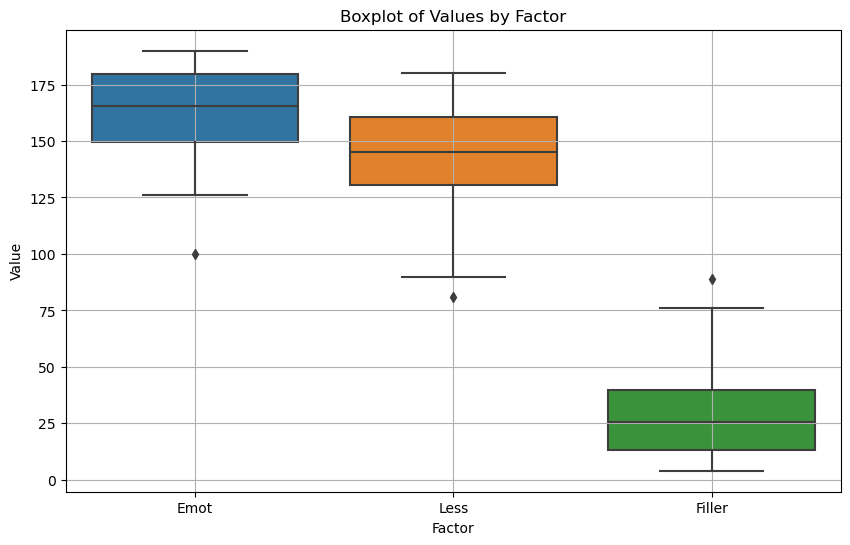

In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из Excel файла
file_path = 'averages_by_category3.xlsx'
data = pd.read_excel(file_path)

# Замена запятых на точки в числовых переменных
data['Emot'] = data['Emot'].astype(str).str.replace(',', '.').astype(float)
data['Less'] = data['Less'].astype(str).str.replace(',', '.').astype(float)
data['Filler'] = data['Filler'].astype(str).str.replace(',', '.').astype(float)

# Проверка структуры данных
print(data.head())

# Преобразование данных для критерия Краскала-Уоллиса
data_melted = pd.melt(data, id_vars=['Respondent'], value_vars=['Emot', 'Less', 'Filler'], 
                      var_name='Factor', value_name='Value')

# Критерий Краскала-Уоллиса
kruskal_stat, p_value = stats.kruskal(
    data_melted[data_melted['Factor'] == 'Emot']['Value'],
    data_melted[data_melted['Factor'] == 'Less']['Value'],
    data_melted[data_melted['Factor'] == 'Filler']['Value']
)

# Общее количество наблюдений
N = data_melted['Value'].count()

# Частичное квадратное значение η²
partial_eta_squared = kruskal_stat / (N - 1)

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    interpretation = "Отказ от нулевой гипотезы: существуют статистически значимые различия между группами."
else:
    interpretation = "Нет оснований для отказа от нулевой гипотезы: статистически значимых различий нет."

# Форматированный вывод F-статистики и p-value
print(f'Kruskal-Wallis H-statistic: F({len(data_melted["Factor"].unique()) - 1}) = {kruskal_stat:.2f}, p = {p_value:.4f}')
print(f'Partial Eta Squared: {partial_eta_squared:.4f}')
print(interpretation)

# Визуализация результатов
plt.figure(figsize=(10, 6))
sns.boxplot(x='Factor', y='Value', data=data_melted)
plt.title('Boxplot of Values by Factor')
plt.xlabel('Factor')
plt.ylabel('Value')
plt.grid(True)
plt.show()

                    Respondent  Emot1  Less1  Filler1   Emot   Less  Filler  \
0  002_Yannis_2023-02-21_13h55  4.025  3.950    0.975  161.0  158.0    39.0   
1  016_Yannis_2023-02-28_19h45  4.150  4.175    0.675  166.0  167.0    27.0   
2  021_Yannis_2023-03-02_13h24  4.150  3.625    1.175  166.0  145.0    47.0   
3  010_Yannis_2023-02-27_10h50  3.875  3.525    2.225  155.0  141.0    89.0   
4  018_Yannis_2023-03-01_13h45  4.150  3.500    0.550  166.0  140.0    22.0   

   all  
0  358  
1  360  
2  358  
3  385  
4  328  
Friedman test statistic: 73.6026
P-value: 0.0000
Отказ от нулевой гипотезы: существуют статистически значимые различия между группами.


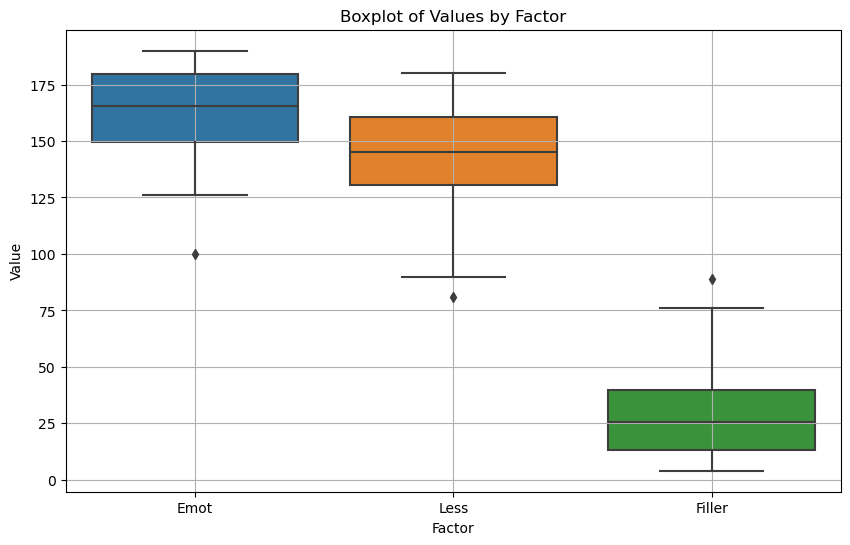

In [77]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из Excel файла
file_path = 'averages_by_category3.xlsx'
data = pd.read_excel(file_path)

# Замена запятых на точки в числовых переменных
data['Emot'] = data['Emot'].astype(str).str.replace(',', '.').astype(float)
data['Less'] = data['Less'].astype(str).str.replace(',', '.').astype(float)
data['Filler'] = data['Filler'].astype(str).str.replace(',', '.').astype(float)

# Проверка структуры данных
print(data.head())

# Применение критерия Фридмана
friedman_stat, p_value = stats.friedmanchisquare(
    data['Emot'],
    data['Less'],
    data['Filler']
)

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    interpretation = "Отказ от нулевой гипотезы: существуют статистически значимые различия между группами."
else:
    interpretation = "Нет оснований для отказа от нулевой гипотезы: статистически значимых различий нет."

# Вывод результатов теста и интерпретации
print(f'Friedman test statistic: {friedman_stat:.4f}')
print(f'P-value: {p_value:.4f}')
print(interpretation)

# Визуализация результатов
data_melted = pd.melt(data, id_vars=['Respondent'], value_vars=['Emot', 'Less', 'Filler'], 
                       var_name='Factor', value_name='Value')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Factor', y='Value', data=data_melted)
plt.title('Boxplot of Values by Factor')
plt.xlabel('Factor')
plt.ylabel('Value')
plt.grid(True)
plt.show()

                    Respondent   Emot   Less  Filler
0  002_Yannis_2023-02-21_13h55  4.025  3.950   0.975
1  016_Yannis_2023-02-28_19h45  4.150  4.175   0.675
2  021_Yannis_2023-03-02_13h24  4.150  3.625   1.175
3  010_Yannis_2023-02-27_10h50  3.875  3.525   2.225
4  018_Yannis_2023-03-01_13h45  4.150  3.500   0.550
ANOVA F-statistic: 444.0728, P-value: 0.0000
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Emot Filler  -3.3454    0.0 -3.6337 -3.0571   True
  Emot   Less  -0.4816 0.0004 -0.7699 -0.1933   True
Filler   Less   2.8638    0.0  2.5755  3.1521   True
----------------------------------------------------
Post hoc comparisons using Tukey's test confirmed a significant difference in perceived level of ethical norm violation between . Overall, behavioral results have confirmed that euphemisms significantly reduced perceived ethical norms violations as compared to non-e

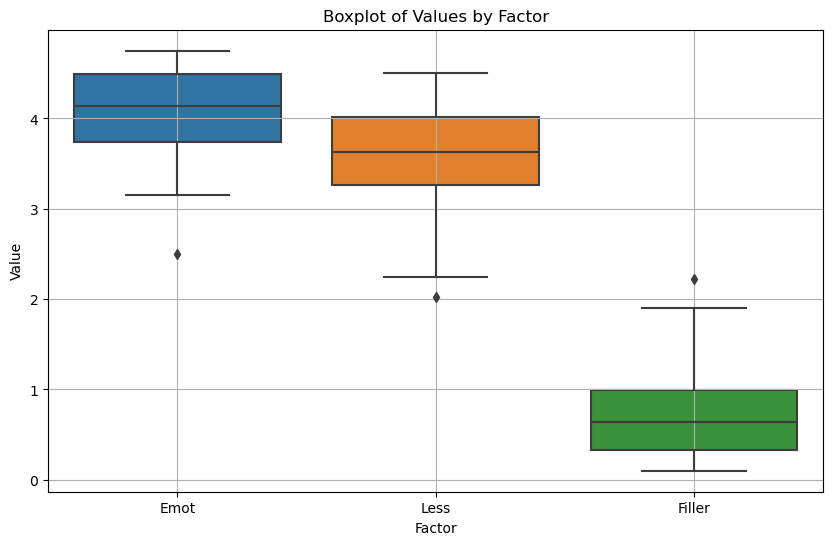

In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Загрузка данных из Excel файла
file_path = 'averages_by_category.xlsx'
data = pd.read_excel(file_path)

# Замена запятых на точки в числовых переменных
data['Emot'] = data['Emot'].astype(str).str.replace(',', '.').astype(float)
data['Less'] = data['Less'].astype(str).str.replace(',', '.').astype(float)
data['Filler'] = data['Filler'].astype(str).str.replace(',', '.').astype(float)

# Проверка структуры данных
print(data.head())

# Преобразование данных для теста Тьюки
data_melted = pd.melt(data, value_vars=['Emot', 'Less', 'Filler'], 
                       var_name='Factor', value_name='Value')

# Выполнение ANOVA
anova_result = stats.f_oneway(data['Emot'], data['Less'], data['Filler'])
print(f'ANOVA F-statistic: {anova_result.statistic:.4f}, P-value: {anova_result.pvalue:.4f}')

# Если ANOVA значимая, выполняем тест Тьюки
alpha = 0.05
if anova_result.pvalue < alpha:
    tukey_result = pairwise_tukeyhsd(data_melted['Value'], data_melted['Factor'])
    print(tukey_result)

    # Интерпретация результатов
    significant_pairs = tukey_result.summary().data[1:]
    p_values = {f"{pair[0]} vs {pair[1]}": pair[3] for pair in significant_pairs if pair[5] == True}

    # Формирование текста интерпретации
    interpretation_text = "Post hoc comparisons using Tukey's test confirmed a significant difference in perceived level of ethical norm violation between "
    interpretation_text += ', '.join([f"{pair} (p = {p:.4f})" for pair, p in p_values.items()])
    interpretation_text += ". Overall, behavioral results have confirmed that euphemisms significantly reduced perceived ethical norms violations as compared to non-euphemized and neutral words."
    
else:
    interpretation_text = "Нет оснований для отказа от нулевой гипотезы: статистически значимых различий нет."

# Вывод результатов интерпретации
print(interpretation_text)

# Визуализация результатов
plt.figure(figsize=(10, 6))
sns.boxplot(x='Factor', y='Value', data=data_melted)
plt.title('Boxplot of Values by Factor')
plt.xlabel('Factor')
plt.ylabel('Value')
plt.grid(True)
plt.show()